In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/'

train_path = data_path + 'train/'
valid_path = data_path +'val/'
test_path = data_path + 'test/'

In [4]:
from glob import glob

print(len(glob(train_path + "*/*")))
print(len(glob(valid_path + "*/*")))
print(len(glob(test_path + "*/*")))

5216
16
624


In [5]:
all_normal_imgs = []
all_pneumonia_imgs = []

for cat in ['train/', 'val/', '/test']:
    data_cat_path = data_path + cat

    normal_imgs = glob(data_cat_path + 'NORMAL/*')
    pneumonia_imgs = glob(data_cat_path + 'PNEUMONIA/*')

    all_normal_imgs.extend(normal_imgs)
    all_pneumonia_imgs.extend(pneumonia_imgs)

print(len(all_normal_imgs))
print(len(all_pneumonia_imgs))

1349
3883


([<matplotlib.patches.Wedge at 0x7f0439c542e0>,
 [Text(0.7584347760559119, 0.7967287433430645, 'Normal'),
  Text(-0.758434776055912, -0.7967287433430644, 'Pneumonia')],
 [Text(0.4136916960304974, 0.43457931455076243, '25.8%'),
  Text(-0.41369169603049744, -0.4345793145507624, '74.2%')])

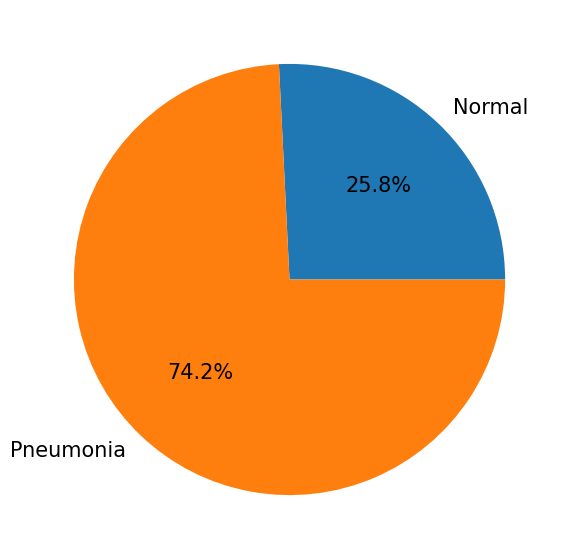

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7,7))

label = ['Normal', 'Pneumonia']

plt.pie([len(all_normal_imgs), len(all_pneumonia_imgs)],
       labels=label,
       autopct='%.1f%%')

In [9]:
import matplotlib.gridspec as gridspec
import cv2

def show_image(img_paths, rows=2, cols=3):
    assert len(img_paths) <= rows*cols

    mpl.rc('font', size=8)
    plt.figure(figsize=(15, 8))
    grid = gridspec.GridSpec(rows, cols)

    for idx, img_path in enumerate(img_paths):
        image = cv2.imread(img_path)
        ax = plt.subplot(grid[idx])
        ax.imshow(image)

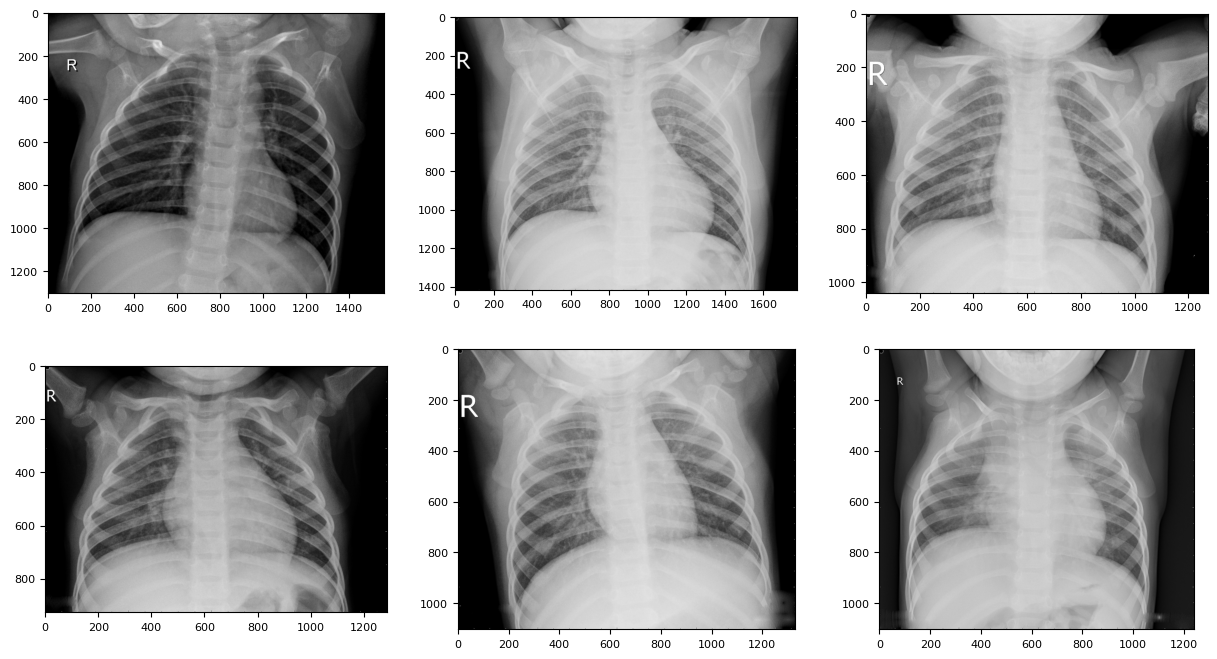

In [10]:
num_of_imgs = 6
normal_imgs_path = all_normal_imgs[-num_of_imgs:]

show_image(normal_imgs_path)

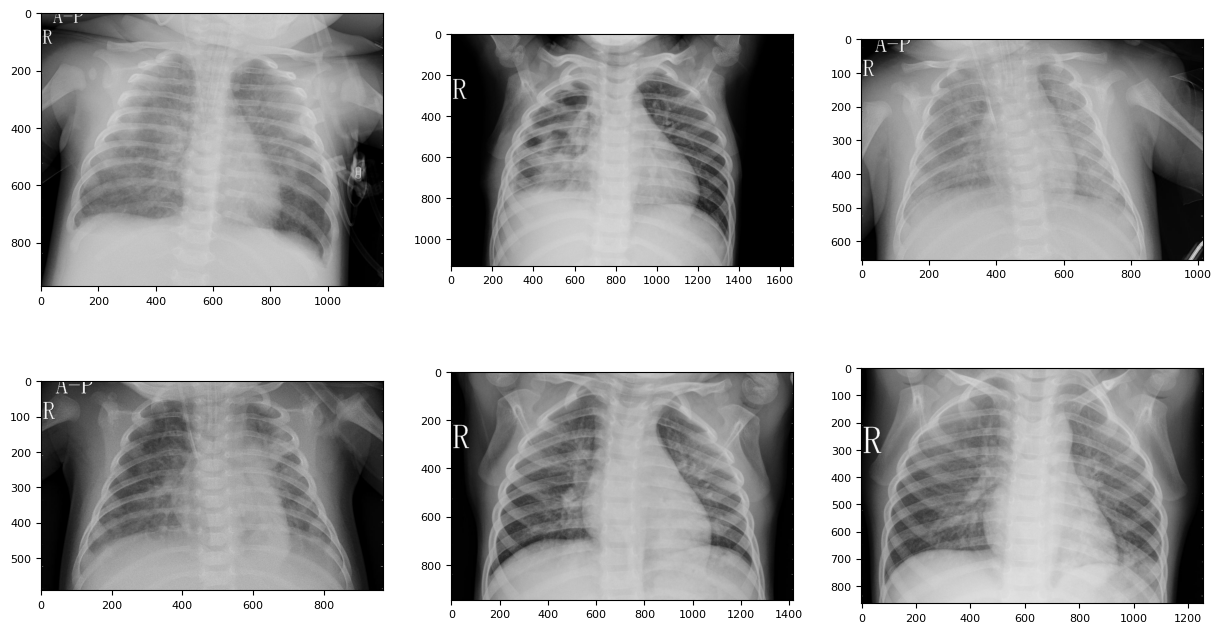

In [11]:
pneumonia_img_path = all_pneumonia_imgs[-num_of_imgs:]

show_image(pneumonia_img_path)